# 1. Introdução

## 1.1 Que banco de dados é esse? 🤔
*Trata-se de um banco de dados com uma gama de informações sociodemográficas, econômicas e acadêmicas, no estudo em questão os autores usaram dados institucionais, adquiridos de várias bases de dados desarticuladas. Fizeram todo o pre-processamento e limpeza para garantir ausência de nulls e outliers. A amostra é de estudantes em cursos de ensino superior do Instituto Politécnico de Portalegre, em Portugal. Os dados foram  adquiridos entre os intervalos de tempo dos semestres letivos de 2008/2009 a 2018/2019 (Martins et al., 2021).*

Trata-se de um banco de dados projetado para desenvolvimento de um modelo de aprendizado supervisionado, existem inputs e outputs (Variáveis Independentes e Dependentes) previamente selecionados e registrados, que servirão para a elaboração de um modelo preditivo com classificação múltipla (3 outputs).



## 1.2 Definição do Problema 🎯
Com o dataset em mãos, visa-se compreender de forma mais profunda a amostra, para futuramente desenvolver de forma assertiva um modelo de Machine Learning que seja capaz de aproximar de fato quais variáveis podem estar associadas a sucesso e abandono acadêmico



## 1.3 Dicionário do DataSet 📖

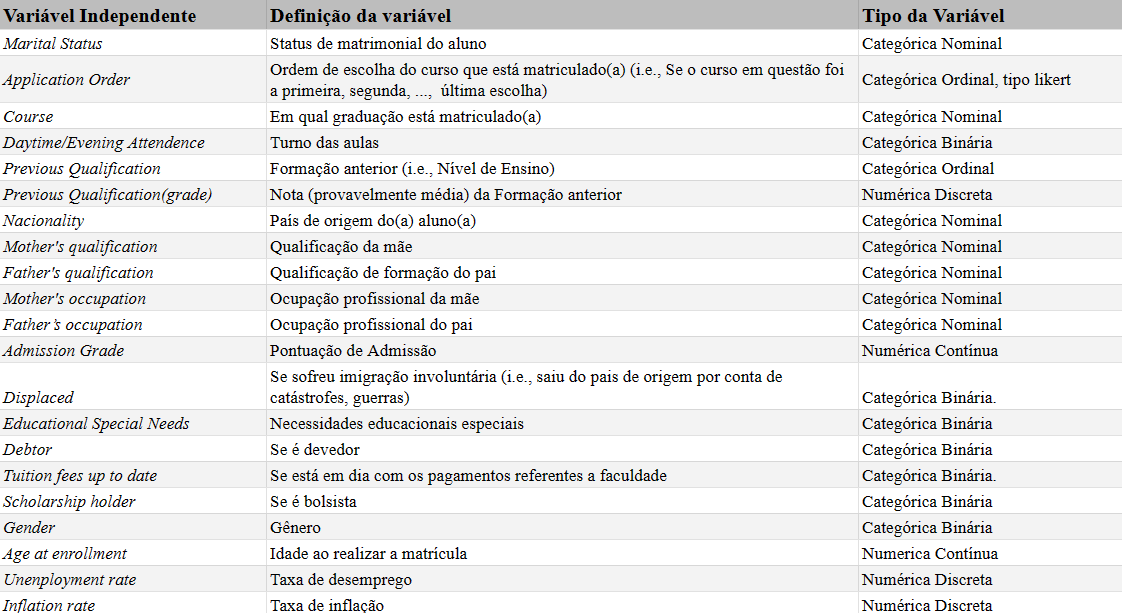

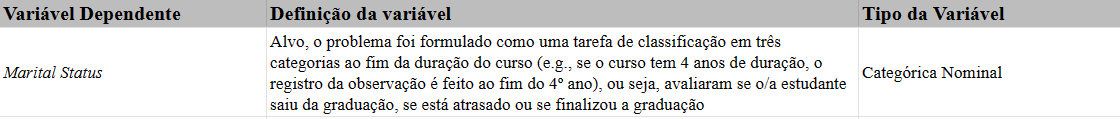


# **2. Importando as bibliotecas e criando o dataframe**

## 2.1 Importando as bibliotecas para análises estatísticas e visualização dos dados

In [70]:
#Criação e gerenciamento de dataframes
import pandas as pd

#Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#Manipulação numérica
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

#Testes estatísticos
import statistics as st
import scipy
from scipy.stats import shapiro
from scipy import stats

##2.3. Criando o dataframe

In [71]:
df = pd.read_csv ('https://raw.githubusercontent.com/VitorZe/Projeto-1_Abandono-e-Sucesso-Academico/main/data.csv', delimiter=';') #Banco de dados baixado e hospedado no meu repositório do github

# **3. Pré-Processamento**

##3.1 Redução da Dimensionalidade
* Remoção de atributos que o analista não teve expertise para interpretar

In [72]:
df = df.drop(columns=[
       'Application mode',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'])

##3.2. Renomeando os elementos de atributos categóricos do DataSet.
O banco de dados veio com os valores categóricos em formas númericas (e.g., 8014 na coluna 'course' equivale a 'Serviço social (vespertino)', 11 na coluna 'nacionality' equivale a 'Itália'), então para melhor compreensão, faz-se necessária a rotulação dos valores categóricos com base no dicionário que os criadores do dataset disponibilizaram.

Vale ressaltar que alguns atributos (Previous qualification, Mother Qualification e Father Qualification) tiveram seus elementos simplificados para facilitar interpretação e compreensão do dataset


In [73]:
df['Marital status'] = df['Marital status'].replace([1, 2, 3, 4, 5, 6], ['Solteiro(a)', 'Casado(a)', 'Viuvo(a)', 'Divorciado(a)', 'União de fato', 'Separado legalmente'])

df['Course'] = df['Course'].replace([33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
 ['Tecnologias de produção de biocombustível', 'Animação e design de multimídia',
'Serviço social (Verspertino)', 'Agronomia',  'Design da Comunicação', 'Enfermagem Veterinária','Engenharia Informática', 'Equinocultura', 'Administração', 'Serviço Social', 'Turismo',
'Enfermagem', 'Higiene Oral', 'Publicidade e Gerenciamento de Marketing', 'Jornalismo e Comunicação', 'Educação Básica', 'Administração (Vespertino)'])

df['Daytime/evening attendance'] = df['Daytime/evening attendance'].replace ([0, 1], ['Matutino', 'Vespertino'])

df['Previous qualification'] = df['Previous qualification'].replace ([1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43],
 ['Ens. Médio completo','Ens. Superior completo','Ens. Superior completo','Ens. Superior completo', 'Ens. Superior completo','Ens. Superior completo', 'Ens. Fundamental completo',
  'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Superior completo',
  'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo'
])

df['Nacionality'] = df['Nacionality'].replace([1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
      ['Portugal', 'Alemanha', 'Espanha', 'Itália', 'Holanda', 'Inglaterra', 'Lituânia', 'Angola', 'Cabo Verde', 'Guiné', 'Moçambique', 'São Tomé', 'Turquia',
      'Brasil', 'Romênia', 'Modávia', 'México', 'Ucrânia', 'Russia', 'Cuba', 'Colombia'])

df["Mother's qualification"] = df["Mother's qualification"].replace ([1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [
'Ens. Médio completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Fundamental completo',
'Ens. Fundamental completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Curso técnico/profissional', 'Ens. Fundamental completo', 'Curso técnico/profissional',
'Ens. Fundamental incompleto', 'Ens. Superior completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto', 'Desconhecido', 'Analfabeto(a)', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto',
'Ens. Fundamental incompleto', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo'
])

df["Father's qualification"] = df["Father's qualification"].replace ([1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [
'Ens. Médio completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Fundamental completo',
'Ens. Fundamental completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Ens. Fundamental completo', 'Curso técnico/profissional',
'Ens. Médio completo', 'Ens. Médio completo', 'Curso técnico/profissional', 'Ens. Fundamental completo', 'Ens. Fundamental incompleto', 'Ens. Médio completo', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto',
'Curso técnico/profissional', 'Curso técnico/profissional', 'Desconhecido', 'Analfabeto(a)', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto', 'Ens. Fundamental incompleto', 'Ens. Superior completo',
'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo', 'Ens. Superior completo','Ens. Superior completo',
])
df["Mother's occupation"] = df["Mother's occupation"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194],
 ['Estudante', 'Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos','Especialistas em Atividades Intelectuais e Científicas', 'Técnicos e Profissões de Nível Intermediário',
  'Pessoal administrativo', 'Serviços pessoais, trabalhadores e vendedores de segurança e proteção', 'Agricultores e trabalhadores qualificados na agricultura, pesca e silvicultura',
  'Trabalhadores qualificados na indústria, construção e artesãos', 'Operadores de instalação e máquinas e trabalhadores de montagem', 'Trabalhadores não qualificados', 'Profissões das Forças Armadas',
  'Outra situação', '(em branco)', 'Profissionais de saúde', 'Professores', 'Especialistas em tecnologias de informação e comunicação (TIC)', 'Técnicos e profissões de ciência e engenharia de nível intermediário',
  'Técnicos e profissionais, de nível intermédio de saúde', 'Técnicos de nível intermédio dos serviços jurídicos, sociais, desportivos, culturais e similares', 'Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados',
  'Dados, contabilidade, estatística, serviços financeiros e operadores relacionados a registros', 'Outro pessoal de apoio administrativo', 'trabalhadores de serviços pessoais', 'vendedores', 'Trabalhadores de cuidados pessoais e similares',
  'Trabalhadores qualificados da construção civil e similares, exceto eletricistas', 'Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares',
  'Trabalhadores no processamento de alimentos, marcenaria, vestuário e outras indústrias e artesanato', 'Trabalhadores de limpeza', 'Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura',
  'Trabalhadores não qualificados na indústria extractiva, construção, indústria transformadora e transportes', 'Assistentes de preparação de refeições'])

df["Father's occupation"] = df["Father's occupation"].replace([0, 1, 2,3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 134, 135, 141, 143, 144, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195],
 ['Estudante', 'Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos', 'Especialistas em Atividades Intelectuais e Científicas',
  'Técnicos e Profissões de Nível Intermediário', 'Pessoal administrativo', 'Serviços pessoais, trabalhadores e vendedores de segurança e proteção',
  'Agricultores e trabalhadores qualificados na agricultura, pesca e silvicultura', 'Trabalhadores qualificados na indústria, construção e artesãos','Operadores de instalação e máquinas e trabalhadores de montagem',
  'Trabalhadores não qualificados', 'Profissões das Forças Armadas', 'Outra situação', '(em branco)', 'Oficiais das Forças Armadas', 'Sargentos das Forças Armadas', 'Outro pessoal das Forças Armadas',
  'Diretores de serviços administrativos e comerciais', 'Diretores de hotelaria, restauração, comércio e outros serviços', 'Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas',
  'Profissionais de saúde', 'Professores', 'Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais', 'Técnicos e profissões de ciência e engenharia de nível intermediário',
  'Técnicos e profissionais, de nível intermédio de saúde', 'Técnicos de nível intermédio dos serviços jurídicos, sociais, desportivos, culturais e similares', 'Técnicos de tecnologia da informação e comunicação',
  'Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados', 'Dados, contabilidade, estatística, serviços financeiros e operadores relacionados a registros',
  'Outro pessoal de apoio administrativo', 'trabalhadores de serviços pessoais', 'vendedores', 'Trabalhadores de cuidados pessoais e similares', 'Pessoal de serviços de proteção e segurança',
  'Agricultores orientados para o mercado e trabalhadores qualificados na produção agrícola e animal', 'Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência', 'Trabalhadores qualificados da construção civil e similares, exceto eletricistas',
  'Trabalhadores qualificados em metalurgia, metalomecânica e similares', 'Trabalhadores qualificados em eletricidade e eletrônica',
  'Trabalhadores no processamento de alimentos, marcenaria, vestuário e outras indústrias e artesanato', 'Operadores de instalações fixas e máquinas', 'Trabalhadores de montagem',
  'Condutores de veículos e operadores de equipamentos móveis', 'Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura',
  'Trabalhadores não qualificados na indústria extractiva, construção, indústria transformadora e transportes','Assistentes de preparação de refeições',
  'Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes'])

df['Displaced'] = df['Displaced'].replace([0, 1], ['Não', 'Sim'])

df['Educational special needs'] = df['Educational special needs'].replace([0, 1], ['Não', 'Sim'])

df['Debtor'] = df['Debtor'].replace([0, 1], ['Não', 'Sim'])

df['Tuition fees up to date'] = df['Tuition fees up to date'].replace ([0, 1], ['Não', 'Sim'])

df['Gender']= df['Gender'].replace([0, 1 ], ['Feminino', 'Masculino'])

df['Scholarship holder'] = df['Scholarship holder'].replace([0, 1], ['Não', 'Sim'])

df['International'] = df['International'].replace([0, 1], ['Português', 'Estrangeiro'])

df['Target'] = df['Target'].replace (['Dropout', 'Enrolled', 'Graduate'], ['Abandono','Cursando','Graduado'])

# **4. Análise Exploratória e Visualização dos dados**

In [74]:
df.columns

Index(['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [75]:
df.head()

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Solteiro(a),5,Animação e design de multimídia,Vespertino,Ens. Médio completo,122.0,Portugal,Ens. Fundamental completo,Ens. Fundamental completo,"Serviços pessoais, trabalhadores e vendedores ...",...,Não,Sim,Masculino,Não,20,Português,10.8,1.4,1.74,Abandono
1,Solteiro(a),1,Turismo,Vespertino,Ens. Médio completo,160.0,Portugal,Ens. Médio completo,Ens. Superior completo,Técnicos e Profissões de Nível Intermediário,...,Não,Não,Masculino,Não,19,Português,13.9,-0.3,0.79,Graduado
2,Solteiro(a),5,Design da Comunicação,Vespertino,Ens. Médio completo,122.0,Portugal,Ens. Fundamental incompleto,Ens. Fundamental incompleto,Trabalhadores não qualificados,...,Não,Não,Masculino,Não,19,Português,10.8,1.4,1.74,Abandono
3,Solteiro(a),2,Jornalismo e Comunicação,Vespertino,Ens. Médio completo,122.0,Portugal,Ens. Fundamental incompleto,Ens. Fundamental incompleto,"Serviços pessoais, trabalhadores e vendedores ...",...,Não,Sim,Feminino,Não,20,Português,9.4,-0.8,-3.12,Graduado
4,Casado(a),1,Serviço social (Verspertino),Matutino,Ens. Médio completo,100.0,Portugal,Ens. Fundamental incompleto,Ens. Fundamental incompleto,Trabalhadores não qualificados,...,Não,Sim,Feminino,Não,45,Português,13.9,-0.3,0.79,Graduado


In [76]:
df.tail()

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
4419,Solteiro(a),6,Jornalismo e Comunicação,Vespertino,Ens. Médio completo,125.0,Portugal,Ens. Médio completo,Ens. Médio completo,"Serviços pessoais, trabalhadores e vendedores ...",...,Não,Sim,Masculino,Não,19,Português,15.5,2.8,-4.06,Graduado
4420,Solteiro(a),2,Jornalismo e Comunicação,Vespertino,Ens. Médio completo,120.0,Russia,Ens. Médio completo,Ens. Médio completo,Trabalhadores não qualificados,...,Sim,Não,Feminino,Não,18,Estrangeiro,11.1,0.6,2.02,Abandono
4421,Solteiro(a),1,Enfermagem,Vespertino,Ens. Médio completo,154.0,Portugal,Ens. Fundamental incompleto,Ens. Fundamental incompleto,Trabalhadores não qualificados,...,Não,Sim,Feminino,Sim,30,Português,13.9,-0.3,0.79,Abandono
4422,Solteiro(a),1,Administração,Vespertino,Ens. Médio completo,180.0,Portugal,Ens. Fundamental incompleto,Ens. Fundamental incompleto,"Trabalhadores qualificados na indústria, const...",...,Não,Sim,Feminino,Sim,20,Português,9.4,-0.8,-3.12,Graduado
4423,Solteiro(a),1,Jornalismo e Comunicação,Vespertino,Ens. Médio completo,152.0,Cabo Verde,Ens. Fundamental incompleto,Ens. Fundamental incompleto,"Serviços pessoais, trabalhadores e vendedores ...",...,Não,Sim,Feminino,Não,22,Estrangeiro,12.7,3.7,-1.70,Graduado


## 4.1. Definindo a estética

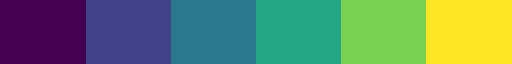

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [77]:
colores = ('#414487')
vcmap = plt.get_cmap ('viridis', 6)
display(vcmap)
coloresviridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range (6)]
plt.style.use ('ggplot')
display(coloresviridis)

## 4.2. Visualização das Distribuições

###4.2.1. Variáveis Binárias

Text(0.5, 0.98, 'Distribuições binárias da amostra do Banco de Dados')

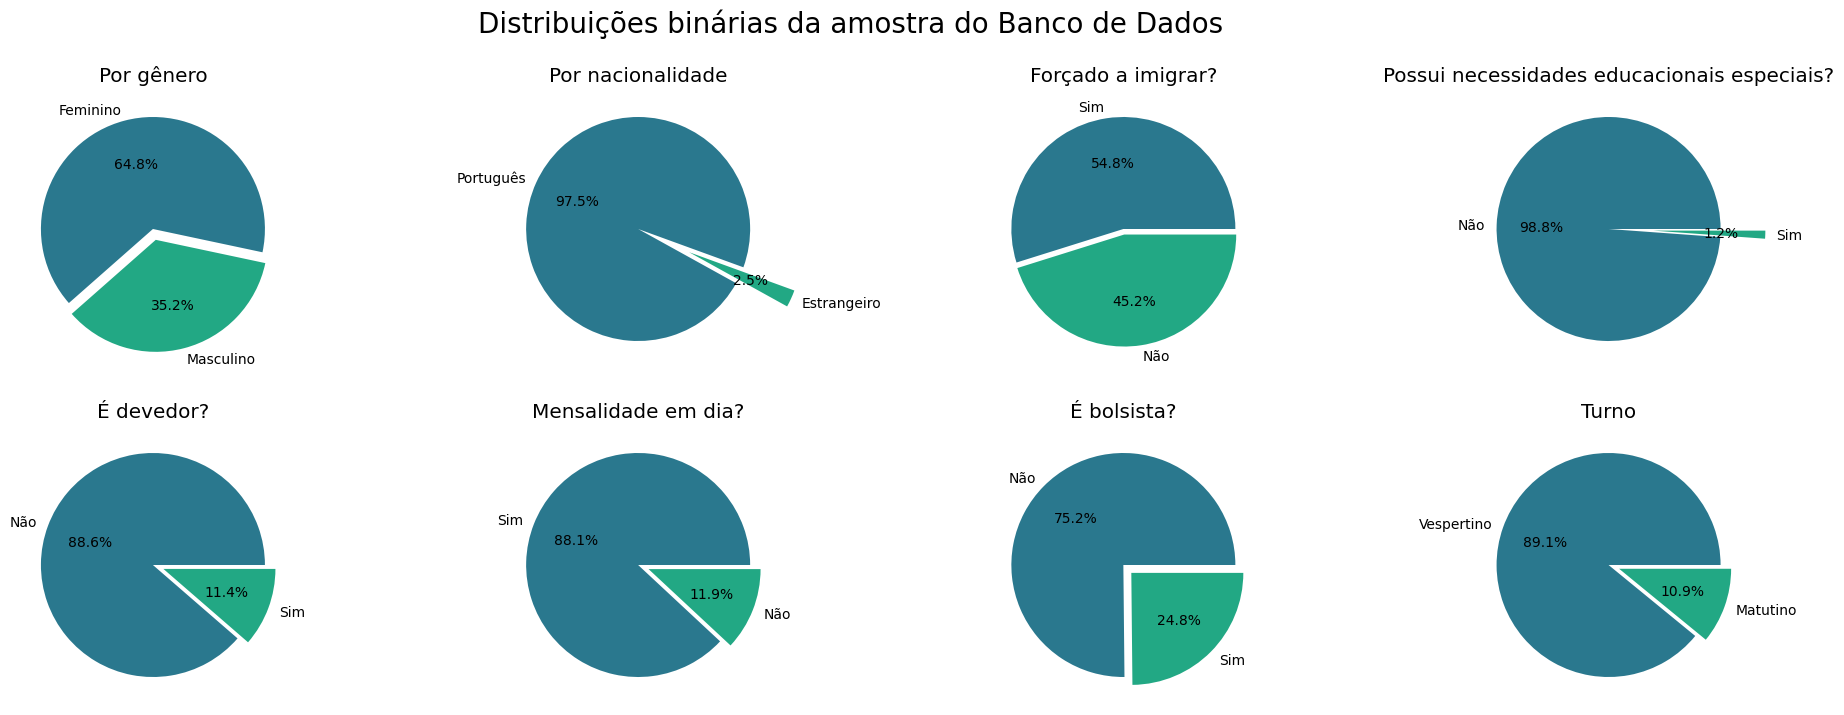

In [78]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(24, 8))

dict_gender = dict(df['Gender'].value_counts())
axs[0,0].pie (dict_gender.values(), labels=dict_gender.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', startangle=-12, explode=(0, 0.1))
axs[0,0].set (title='Por gênero')

dict_international = dict(df['International'].value_counts())
axs[0,1].set (title ='Por nacionalidade')
axs[0,1].pie (dict_international.values(), labels=dict_international.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', startangle=-20, explode=(0, 0.5))

dict_displaced = dict(df['Displaced'].value_counts())
axs[0,2].set (title = 'Forçado a imigrar?')
axs[0,2].pie (dict_displaced.values(), labels=dict_displaced.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', explode=(0, 0.05))

dict_specialneeds = dict(df['Educational special needs'].value_counts())
axs[0,3].set (title = 'Possui necessidades educacionais especiais?')
axs[0,3].pie (dict_specialneeds.values(), labels=dict_specialneeds.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', explode=(0, 0.4))

dict_deves = dict(df['Debtor'].value_counts())
axs[1,0].set (title = 'É devedor?')
axs[1,0].pie (dict_deves.values(), labels=dict_deves.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', explode=(0, 0.1))

dict_deves2 = dict(df['Tuition fees up to date'].value_counts())
axs[1,1].set (title = 'Mensalidade em dia?')
axs[1,1].pie (dict_deves2.values(), labels=dict_deves2.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', explode=(0, 0.1))

dict_bolsa = dict(df['Scholarship holder'].value_counts())
axs[1,2].set (title = 'É bolsista?')
axs[1,2].pie (dict_bolsa.values(), labels=dict_bolsa.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', explode=(0, 0.1))

dict_turno = dict(df['Daytime/evening attendance'].value_counts())
axs[1,3].set (title = 'Turno')
axs[1,3].pie (dict_turno.values(), labels=dict_turno.keys(), colors=('#2a788e', '#22a884'), autopct='%1.1f%%', explode=(0, 0.1))



fig.suptitle('Distribuições binárias da amostra do Banco de Dados', fontsize=20)

### 4.2.2. Vairiáveis categóricas

[Text(0, 0, '1'),
 Text(0, 0, '3026'),
 Text(0, 0, '547'),
 Text(0, 0, '309'),
 Text(0, 0, '249'),
 Text(0, 0, '154'),
 Text(0, 0, '137'),
 Text(0, 0, '1')]

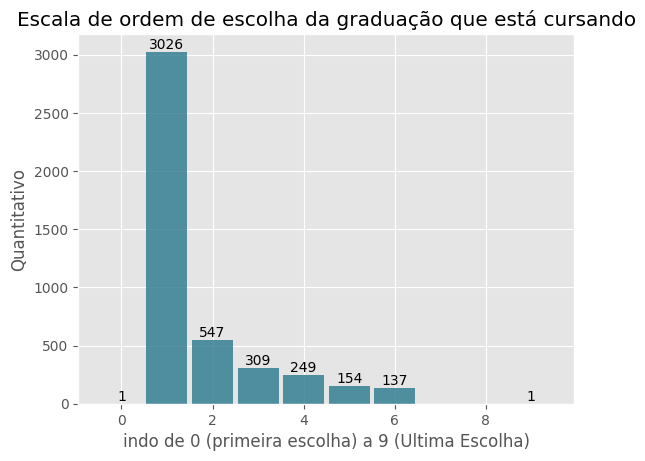

In [79]:
labels, counts = np.unique(df['Application order'], return_counts=True)
fig, ax = plt.subplots()

ax.bar(labels, counts, width=0.9, alpha=0.8, color='#2a788e')
ax.set(title='Escala de ordem de escolha da graduação que está cursando')
ax.set_xlabel('indo de 0 (primeira escolha) a 9 (Ultima Escolha)')
ax.set_ylabel('Quantitativo')
ax.bar_label (ax.containers[0])

4424

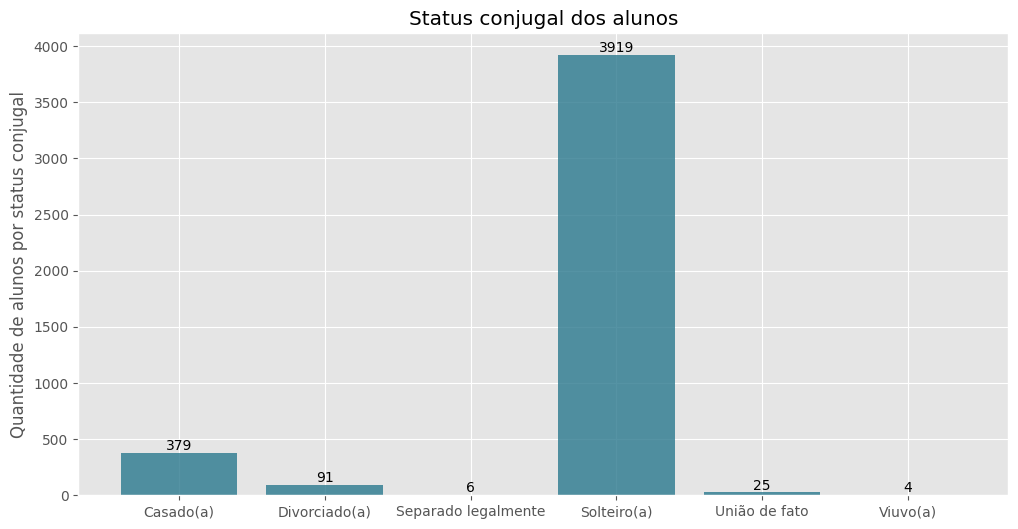

In [80]:
labels, counts = np.unique(df['Marital status'], return_counts=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(labels, counts, alpha=0.8, color='#2a788e')
ax.set_title('Status conjugal dos alunos')
ax.set_ylabel('Quantidade de alunos por status conjugal')
ax.bar_label (ax.containers[0])
df['Marital status'].count()

[Text(0, 0, '232'), Text(0, 0, '3717'), Text(0, 0, '475')]

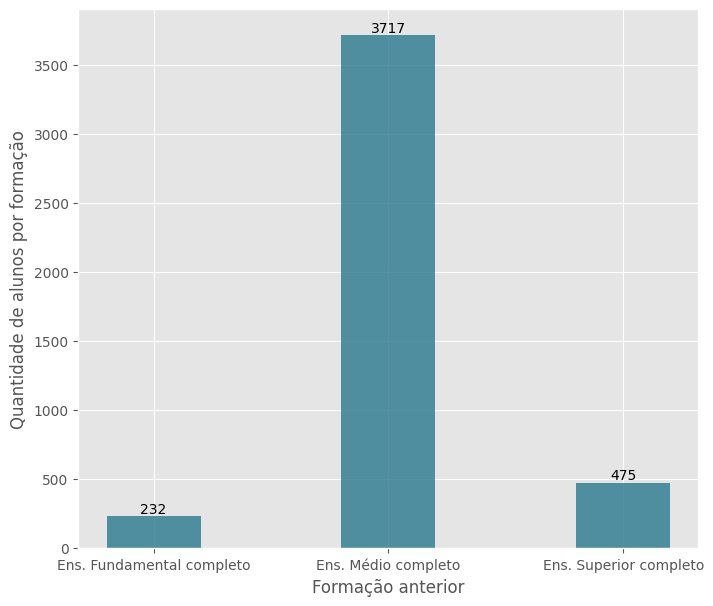

In [81]:
labels, counts = np.unique(df['Previous qualification'], return_counts=True)
fig, ax = plt.subplots(figsize=(8, 7))
ax.bar(labels, counts, alpha=0.8, color='#2a788e', width=0.4)
ax.set_ylabel('Quantidade de alunos por formação')
ax.set_xlabel('Formação anterior')
ax.bar_label (ax.containers[0])

<ipython-input-82-ce43dd5fbd0e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labelsM, rotation=30, ha='right')
<ipython-input-82-ce43dd5fbd0e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labelsP, rotation=30, ha='right')


[Text(0, 0, 'Analfabeto(a)'),
 Text(1, 0, 'Curso técnico/profissional'),
 Text(2, 0, 'Desconhecido'),
 Text(3, 0, 'Ens. Fundamental completo'),
 Text(4, 0, 'Ens. Fundamental incompleto'),
 Text(5, 0, 'Ens. Médio completo'),
 Text(6, 0, 'Ens. Superior completo')]

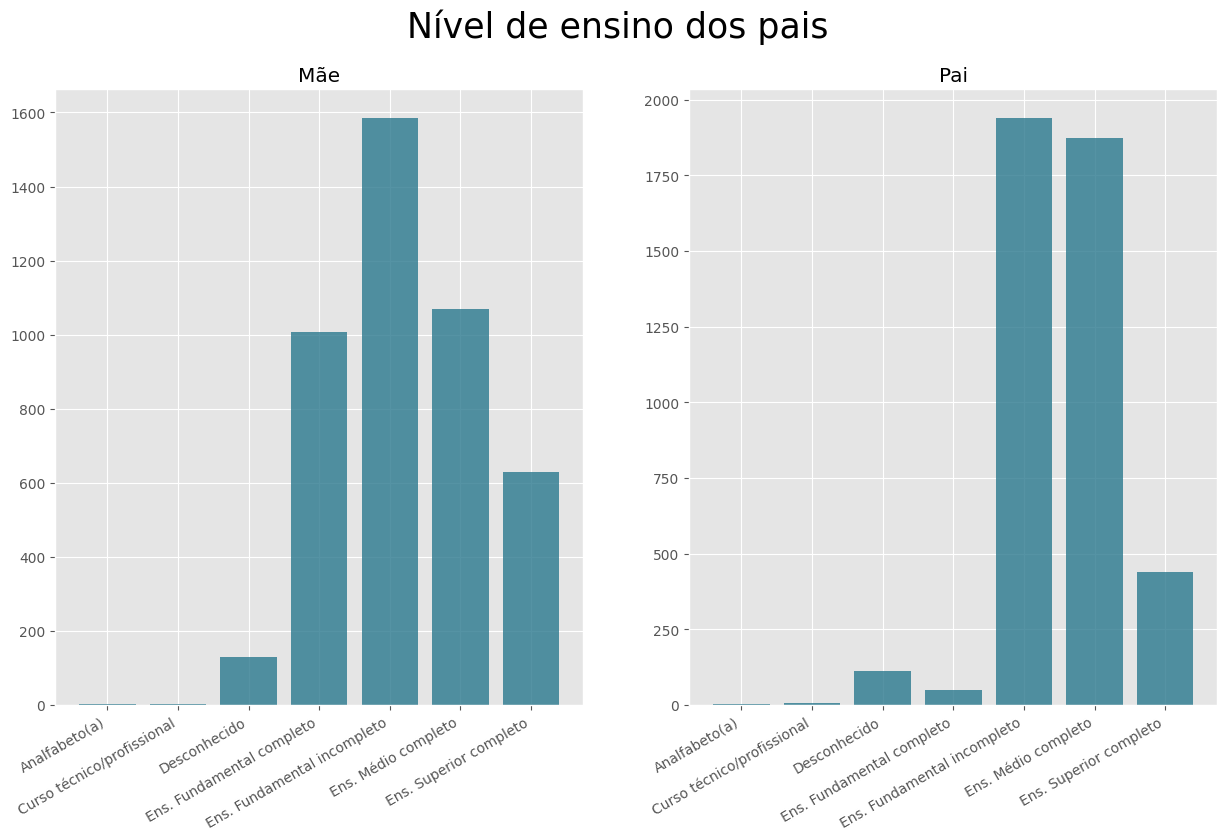

In [82]:

fig, axs = plt.subplots (nrows=1, ncols=2, figsize=(15, 8))
fig.suptitle('Nível de ensino dos pais', fontsize=25)

labelsM, countsM = np.unique(df["Mother's qualification"], return_counts=True)
axs[0].bar (labelsM, countsM, color='#2a788e', alpha=0.8)
axs[0].set_title('Mãe')
axs[0].set_xticklabels(labelsM, rotation=30, ha='right')

labelsP, countsP = np.unique(df["Father's qualification"], return_counts=True)
axs[1].bar (labelsP, countsP, color='#2a788e', alpha=0.8, align='center')
axs[1].set_title('Pai')
axs[1].set_xticklabels(labelsP, rotation=30, ha='right')

4424

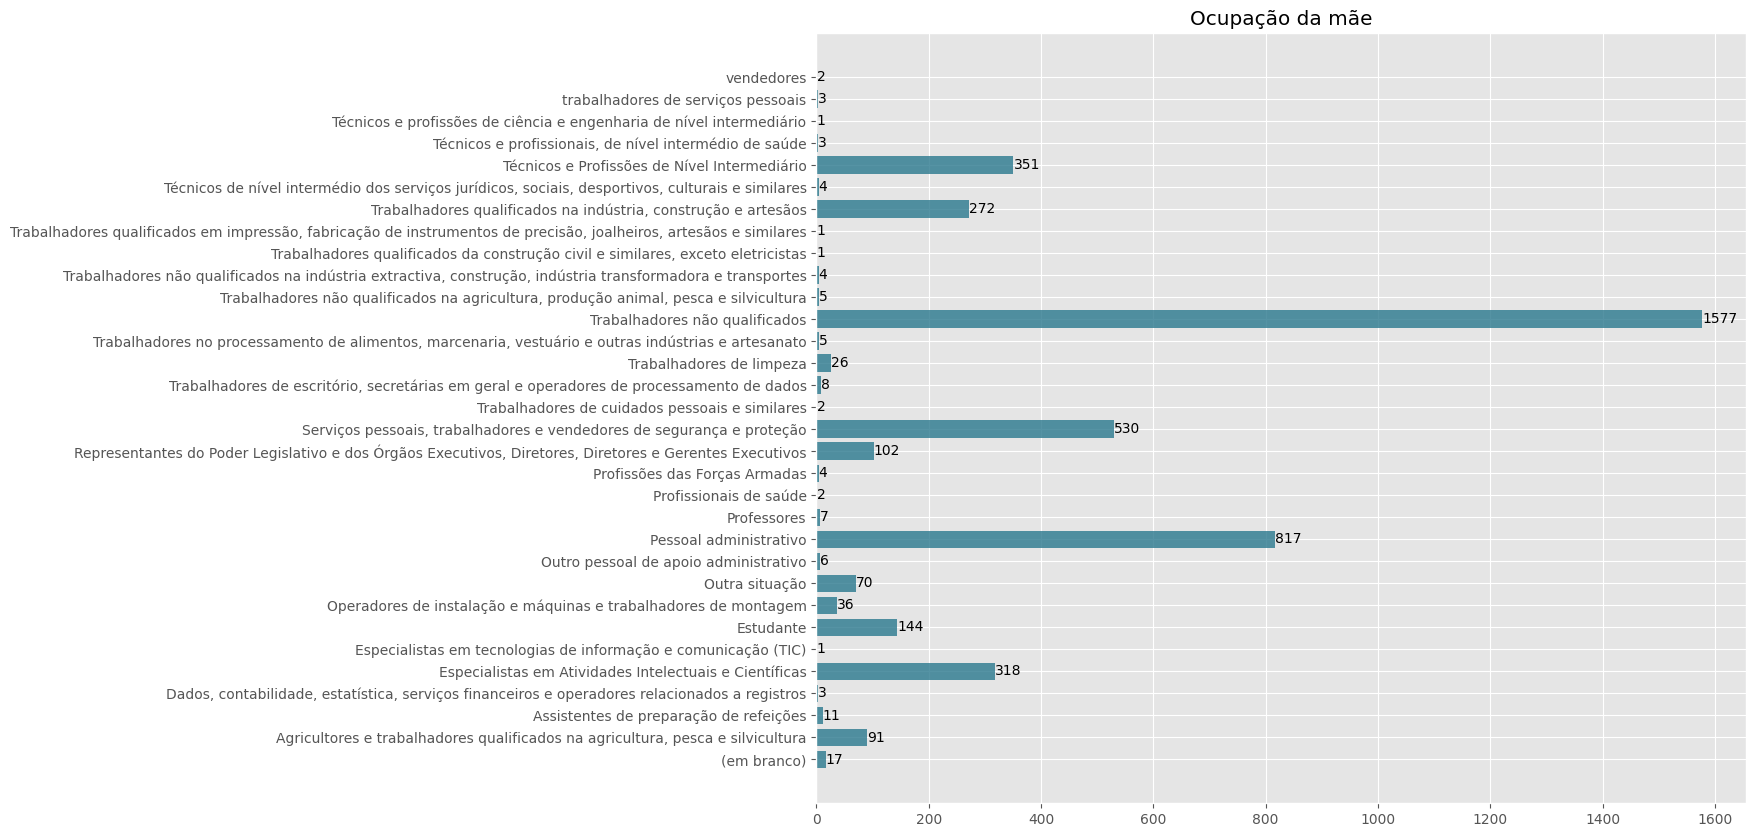

In [83]:
labels, counts = np.unique(df["Mother's occupation"], return_counts=True)
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(labels, counts, alpha=0.8, color='#2a788e')
ax.set_title('Ocupação da mãe')
ax.bar_label (ax.containers[0])
df["Mother's occupation"].count()

4424

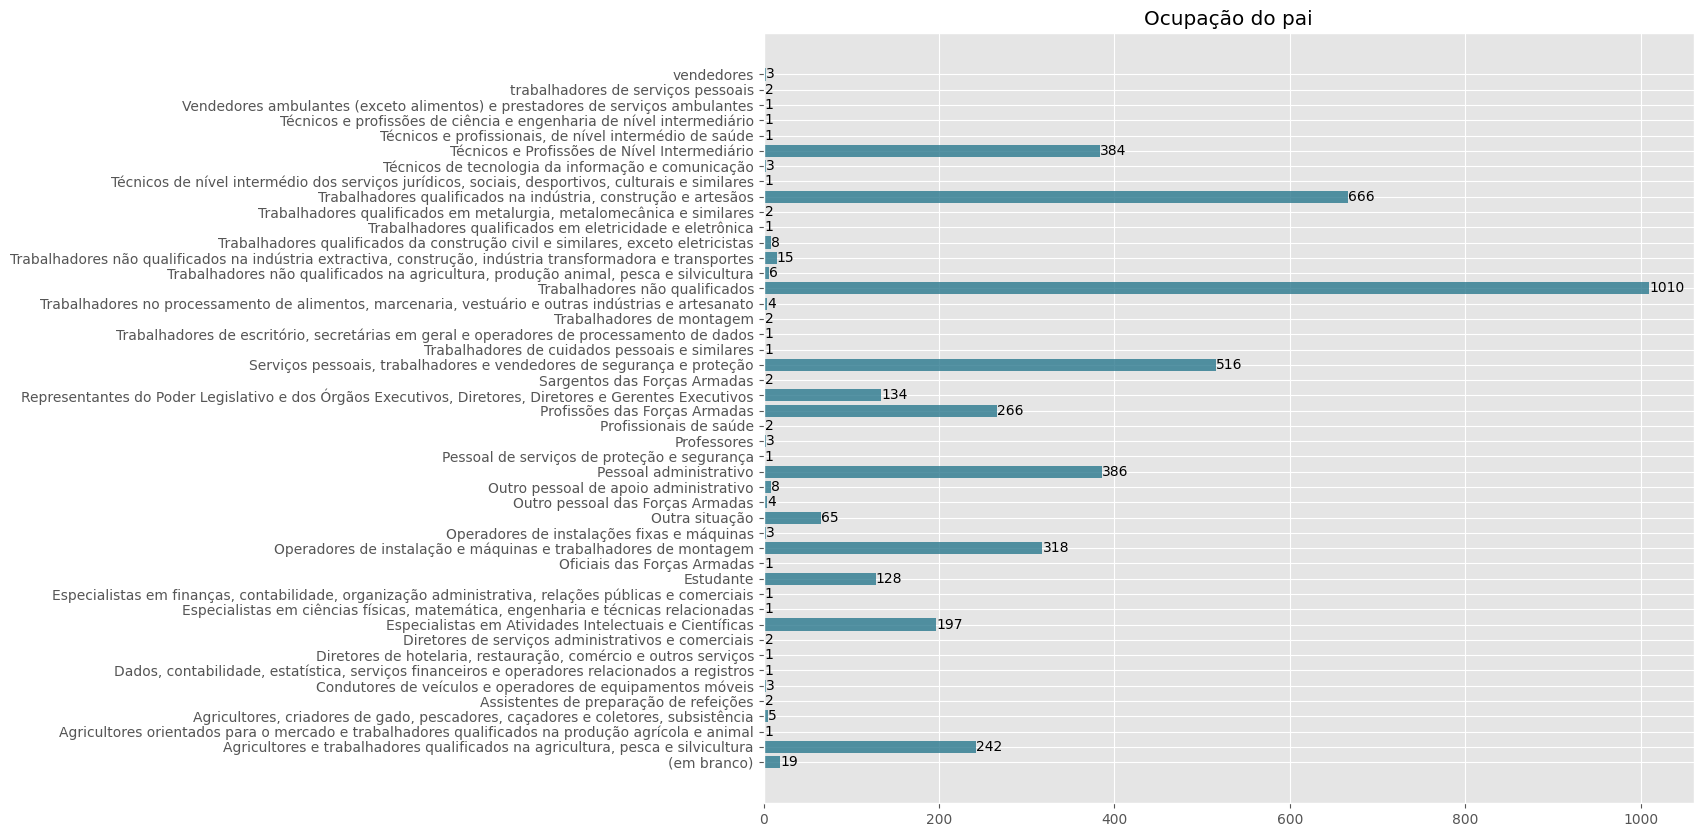

In [84]:
labels, counts = np.unique(df["Father's occupation"], return_counts=True)
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(labels, counts, alpha=0.8, color='#2a788e')
ax.set_title('Ocupação do pai')
ax.bar_label (ax.containers[0])
df["Father's occupation"].count()

###4.2.3. Variáveis numéricas

A visualização de histograma foi escolhida para avaliar visualmente os dados com variação alta de valores discretos no conjunto

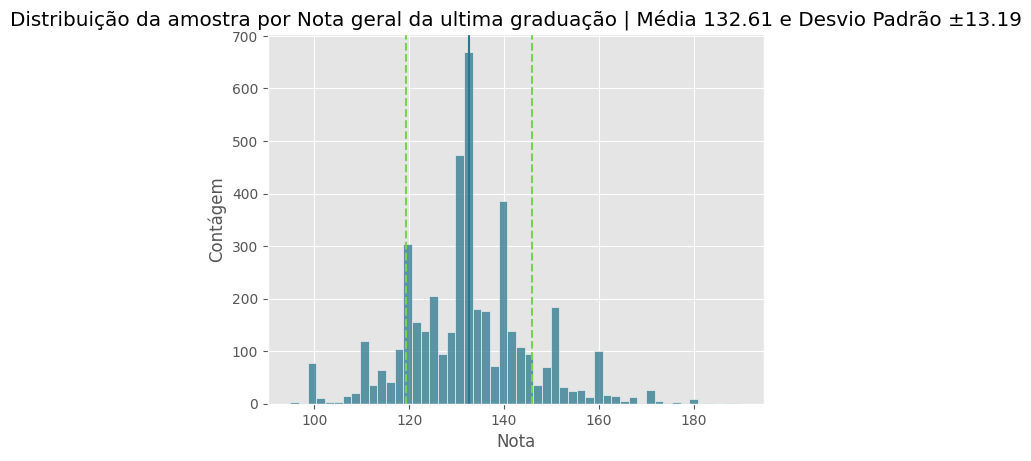

In [85]:
m = st.mean(df['Previous qualification (grade)'])
std = st.stdev(df['Previous qualification (grade)'])

sns.histplot(df['Previous qualification (grade)'], color=('#2a788e'))
plt.title ('Distribuição da amostra por Nota geral da ultima graduação | Média 132.61 e Desvio Padrão ±13.19')
plt.ylabel ('Contágem')
plt.xlabel ('Nota')


plt.axvline(m - std, linestyle='dashed', color='#7ad151')
plt.axvline(m, color='#2a788e')
plt.axvline(m + std, linestyle='dashed', color='#7ad151')   #axvline(valor) cria uma linha vertical no gráfico

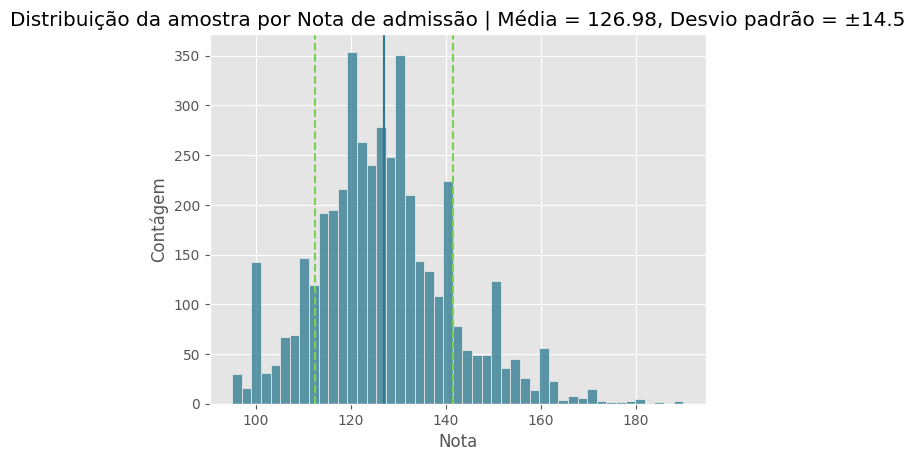

In [86]:
m = st.mean(df['Admission grade'])
std = st.stdev(df['Admission grade'])

sns.histplot (df['Admission grade'], color='#2a788e')
plt.title ('Distribuição da amostra por Nota de admissão | Média = 126.98, Desvio padrão = ±14.5')
plt.ylabel ('Contágem')
plt.xlabel ('Nota')

plt.axvline (m - std, linestyle='dashed', color='#7ad151')
plt.axvline (m, color='#2a788e')
plt.axvline (m + std, linestyle='dashed', color='#7ad151')

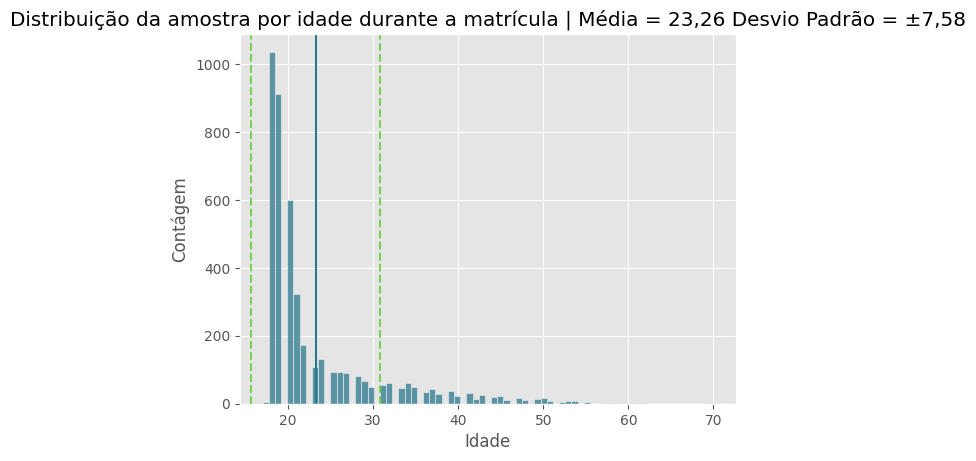

In [87]:
#age at enrolment
m = st.mean (df['Age at enrollment'])
std = st.stdev (df['Age at enrollment'])

plt.title ('Distribuição da amostra por idade durante a matrícula | Média = 23,26 Desvio Padrão = ±7,58')
plt.ylabel ('Contágem')
plt.xlabel ('Idade')
sns.histplot (df['Age at enrollment'], color='#2a788e')

plt.axvline (m - std, color='#7ad151', linestyle='dashed')
plt.axvline (m, color='#2a788e')
plt.axvline (m + std, color='#7ad151', linestyle='dashed')

O Gráfico de densidade foi escolhido por representar melhor visualmente valores contínuos

<Axes: title={'center': 'Taxa de desemprego (%)'}, xlabel='Taxa de desemprego', ylabel='Densidade'>

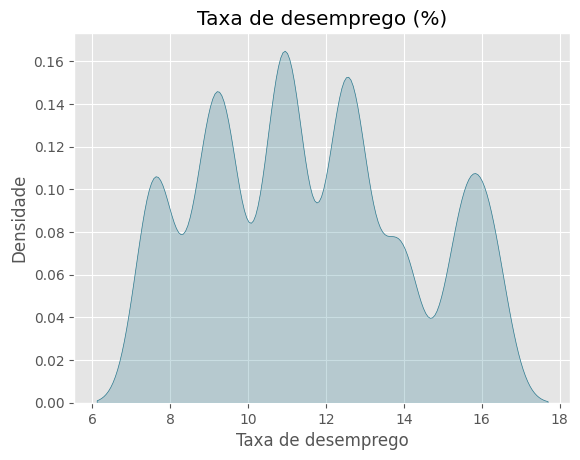

In [88]:
#Taxa de Desemprego (%)
m = st.mean (df['Unemployment rate'])
std = st.stdev (df['Unemployment rate'])

plt.title ('Taxa de desemprego (%)')
plt.ylabel ('Densidade')
plt.xlabel ('Taxa de desemprego')

sns.kdeplot(df['Unemployment rate'], color='#2a788e', fill=True)

<Axes: title={'center': 'Taxa de inflação(%)'}, xlabel='Inflation rate', ylabel='Densidade'>

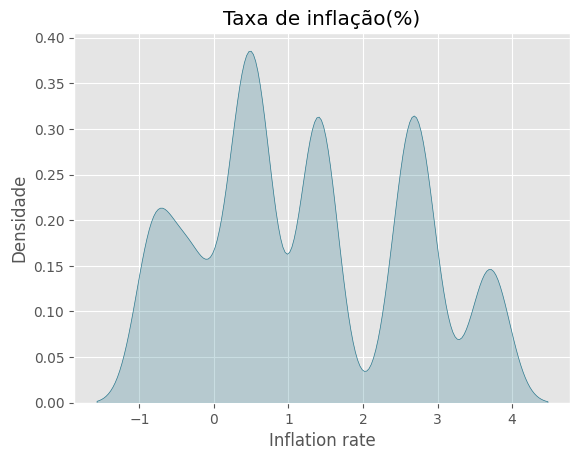

In [89]:
m = st.median (df['Inflation rate'])
std = st.stdev (df['Inflation rate'])

plt.title ('Taxa de inflação(%)')
plt.ylabel('Densidade')
sns.kdeplot(df['Inflation rate'], color='#2a788e', fill=True)

<Axes: title={'center': 'Contagem de alunos por Produto Interno Bruno (PIB)'}, xlabel='PIB', ylabel='Densidade'>

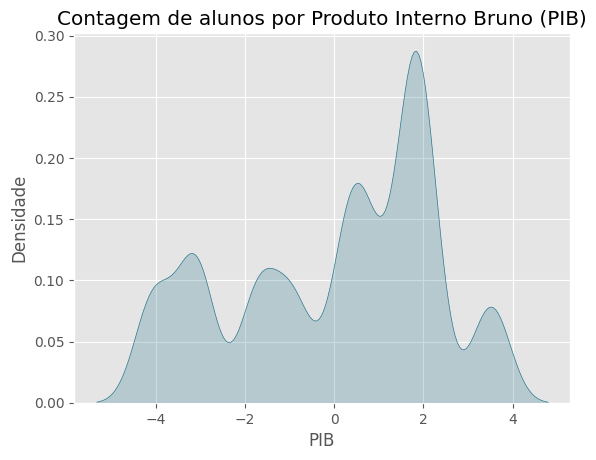

In [90]:
m = st.median (df['GDP'])
std = st.stdev(df['GDP'])

plt.title ('Contagem de alunos por Produto Interno Bruno (PIB)')
plt.ylabel ('Densidade')
plt.xlabel ('PIB')

sns.kdeplot(df['GDP'], color='#2a778e', fill=True)

##4.3. Correlação e Scatterplot

Usando os pontos de corte de Shoer, Boer & Shwarte (2018) vemos que houve uma correlação moderada entre a nota de admissão e da qualificação anterior, além de uma correlação negativa fraca entre PIB e Taxa de desemprego

In [91]:
df_numerico = df[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Inflation rate','GDP', 'Unemployment rate']]

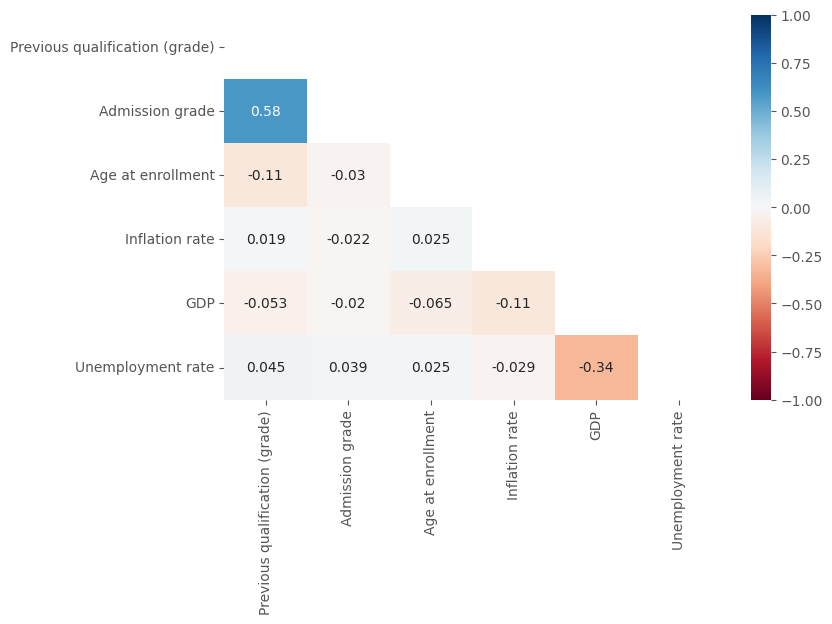

In [92]:
fig, ax = plt.subplots (figsize=(8, 5))
mask = np.triu(df_numerico.corr())
ax = sns.heatmap(df_numerico.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, mask=mask)
ax.set_facecolor('white')

Text(0, 0.5, 'Taxa de desemprego')

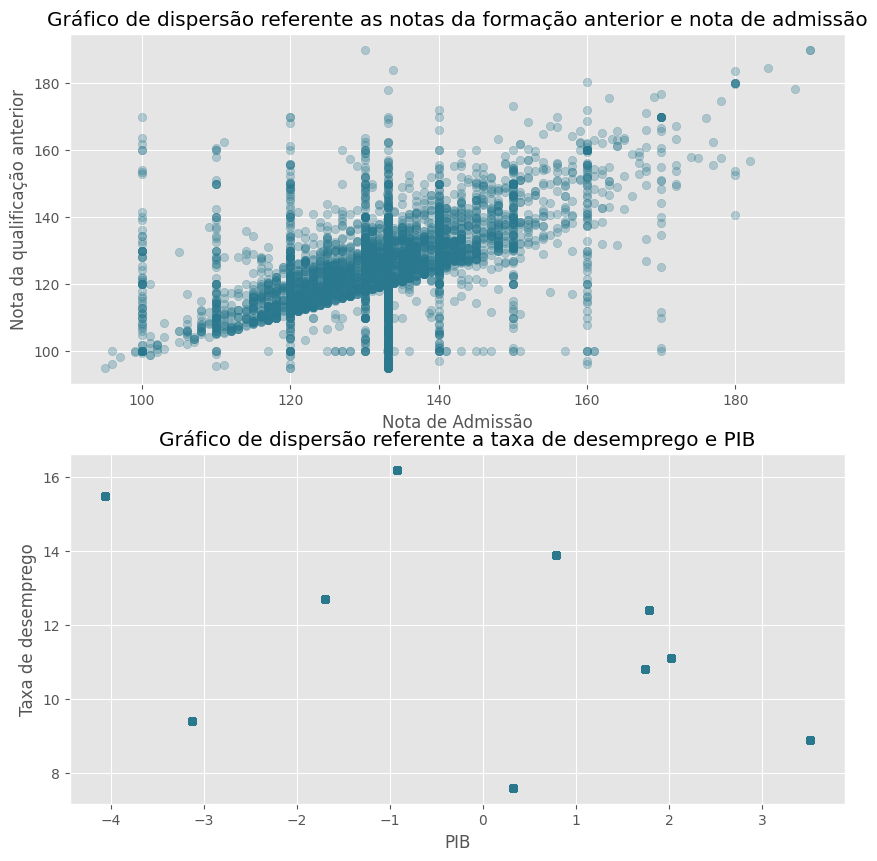

In [93]:
fig, axs = plt.subplots (nrows=2, ncols=1, figsize=(10, 10))

axs[0].scatter(df['Previous qualification (grade)'], df['Admission grade'], color='#2a788e', alpha=0.3)
axs[0].set_title('Gráfico de dispersão referente as notas da formação anterior e nota de admissão')
axs[0].set_xlabel ('Nota de Admissão')
axs[0].set_ylabel ('Nota da qualificação anterior')

axs[1].scatter(df['GDP'], df['Unemployment rate'], color='#2a788e', alpha=0.3)
axs[1].set_title('Gráfico de dispersão referente a taxa de desemprego e PIB')
axs[1].set_xlabel('PIB')
axs[1].set_ylabel('Taxa de desemprego')

# **5. Preparação para o modelo de Machine Learning**




## 5.1 Normalização / Padronização para variáveis numéricas


### *5.1.1 Teste de normalidade*
 Para avaliar se seria usada a normalização ou a padronização, foi escolhido o teste de shapiro-wilk, por ser mais robusto para avaliar a medida de desfecho se comparado a outros testes de normalidade (e.g., Anderson-Darling, Kolmogorov-Smirnov(liliefors)) (Razali & Wah, 2011). E para uma melhor visualização dos resultados, foi criado um dataframe para mostrar a estatística em uma tabela.

**valores de referência (i.e., valores de uma curva normal):**
 * pvalue > 0.05
  * *vale ressaltar que o valor p tende a cair batante quando o
n amostral é muito alto, perdendo confiabilidade, como é o caso deste dataset com n > 4.000*
 * Skewness/Assimetria = 0 ou próximo
 * Kurtosis/Curtose = 0 ou próximo

In [94]:
Av_normalidade = {
    'Variável |': ['Nota da qualificação anterior', 'Pontuação de admissão', 'Idade ao se matricular', 'Taxa de inflação', 'PIB', 'Taxa de desemprego', 'Ordem de escolha do curso'],

    'Valor Shapiro, pvalor |' : [shapiro(df['Previous qualification (grade)']), shapiro(df['Admission grade']), shapiro(df['Age at enrollment']), shapiro(df['Inflation rate']), shapiro(df['GDP']),
                              shapiro(df['Unemployment rate']), shapiro(df['Application order'])],

    'Assimetria |' : [stats.skew(df['Previous qualification (grade)']), stats.skew(df['Admission grade']), stats.skew(df['Admission grade']), stats.skew(df['Inflation rate']),
                    stats.skew(df['GDP']), stats.skew(df['Unemployment rate']), stats.skew(df['Application order'])],

    'Curtose |' : [stats.kurtosis(df['Previous qualification (grade)']), stats.kurtosis(df['Admission grade']), stats.kurtosis(df['Admission grade']), stats.kurtosis(df['Inflation rate']),
                    stats.kurtosis(df['GDP']), stats.kurtosis(df['Unemployment rate']), stats.kurtosis(df['Application order'])]
                  }

tabela_normalidade = pd.DataFrame(Av_normalidade)
tabela_normalidade

,Variável |,"Valor Shapiro, pvalor |",Assimetria |,Curtose |
0,Nota da qualificação anterior,"(0.9798977375030518, 1.4439035880000836e-24)",0.312761,0.965808
1,Pontuação de admissão,"(0.9804928302764893, 3.2225109973241272e-24)",0.530420,0.660620
2,Idade ao se matricular,"(0.7071640491485596, 0.0)",0.530420,0.660620
3,Taxa de inflação,"(0.9238255023956299, 1.0733946236728099e-42)",0.252290,-1.039215
4,PIB,"(0.9120217561721802, 5.605193857299268e-45)",-0.393935,-1.001877
5,Taxa de desemprego,"(0.9347160458564758, 2.5018222262669554e-40)",0.211979,-0.995757
6,Ordem de escolha do curso,"(0.6190690994262695, 0.0)",1.880412,2.646937


### *5.1.2 Aplicação da normalização*


In [95]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerico)

In [96]:
df_norm = pd.DataFrame (df_scaled)
df_norm.head()

,0,1,2,3,4,5
0,0.284211,0.340000,0.056604,0.488889,0.766182,0.372093
1,0.684211,0.500000,0.037736,0.111111,0.640687,0.732558
2,0.284211,0.313684,0.037736,0.488889,0.766182,0.372093
3,0.284211,0.258947,0.056604,0.000000,0.124174,0.209302
4,0.052632,0.489474,0.528302,0.111111,0.640687,0.732558


# *6. Referências* 🔎
* Artigos Citados (APA, 7ª Norma):

 * Martins, M.V. et al., (2021). **Early prediction of student’s performance in higher education:** a case study. Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. https://doi.org/10.1007/978-3-030-72657-7_16.  
 * Razali, N. M., & Wah, Y. B., (2011). **Power comparisons of shapiro-wilk, kolmogorov-smirnov, lilliefors and anderson-darling tests**. Journal of statistical modeling and analytics, 2(1), 21-33.

 * Realinho, V., et al., (2021). **Predict students' dropout and academic success**. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

 * Schober, P. et al., (2018). **Correlation Coefficients**: Appropriate Use and Interpretation. Anesthesia and analgesia, 126(5), 1763–1768. https://doi.org/10.1213/ANE.0000000000002864


* Base de dados original:
 * [Predict students dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

